In [ ]:
import pandas as  pd
import os
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv(os.path.join(os.getcwd(),'WA_Fn-UseC_-Telco-Customer-Churn.csv'))

In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df.isna().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
# remove nan in total charges 
# remove customerID
df.dropna(subset=['TotalCharges'], inplace=True)
df.drop(['customerID'],axis=1,inplace=True)


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'yes', 0:'no'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [9]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


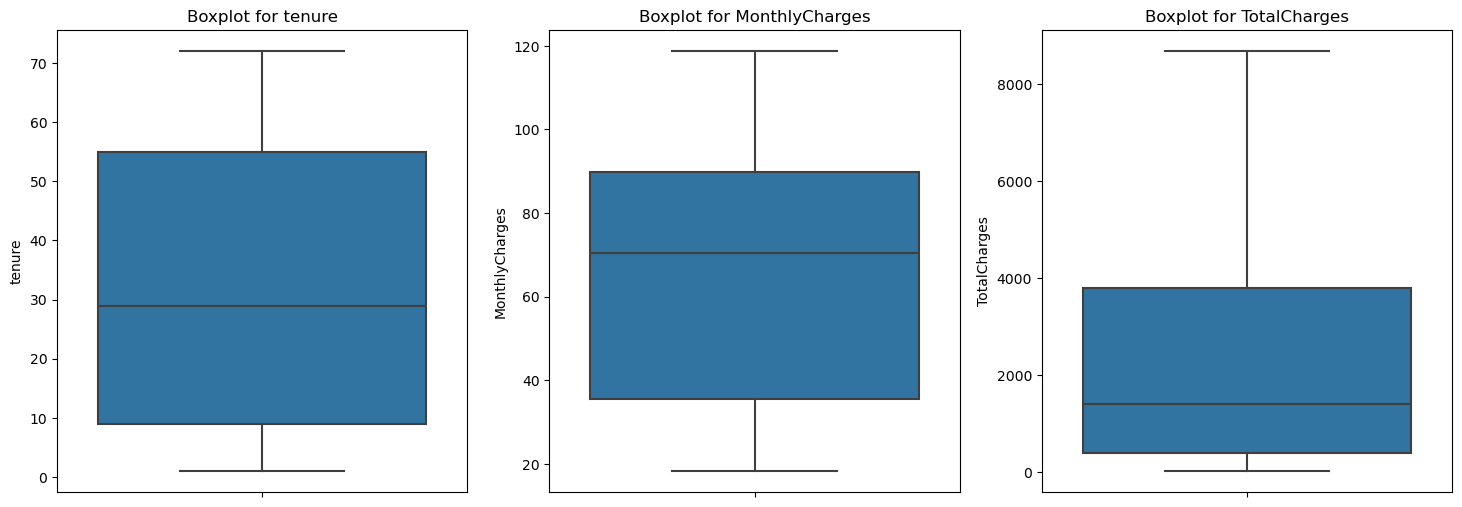

In [11]:
# make boxplot to see outliers

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 1 row, 3 columns

# Create boxplots for each column in the respective axes
sns.boxplot(y=df['tenure'], ax=axes[0])
axes[0].set_title('Boxplot for tenure')

sns.boxplot(y=df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('Boxplot for MonthlyCharges')

sns.boxplot(y=df['TotalCharges'], ax=axes[2])
axes[2].set_title('Boxplot for TotalCharges')

# Show the plot
plt.show()

## `EDA`

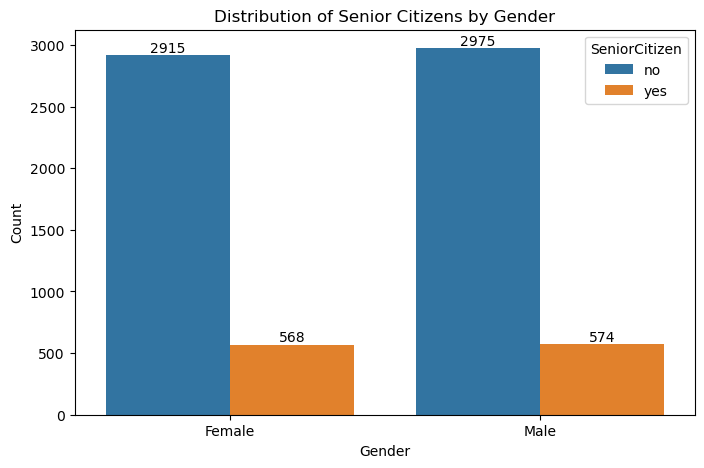

In [12]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="gender", hue="SeniorCitizen")
plt.title("Distribution of Senior Citizens by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Adding count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()


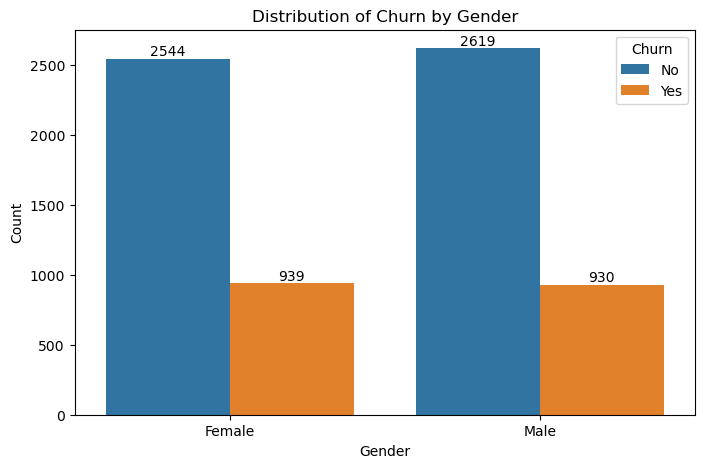

In [13]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="gender", hue="Churn")
plt.title("Distribution of Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Adding count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()


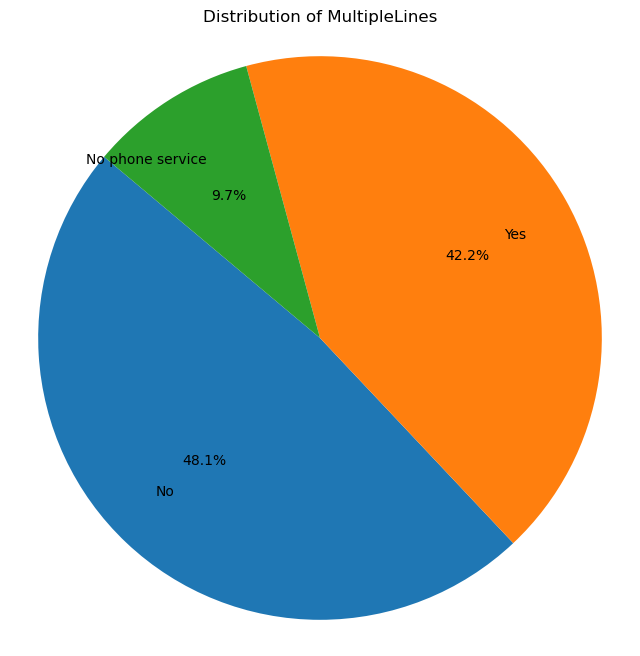

In [14]:
# Count occurrences by gender
MultipleLines_label = df['MultipleLines'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    MultipleLines_label,
    labels=MultipleLines_label.index,
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=0.75  
)
plt.title('Distribution of MultipleLines')
plt.axis('equal')  
plt.show()


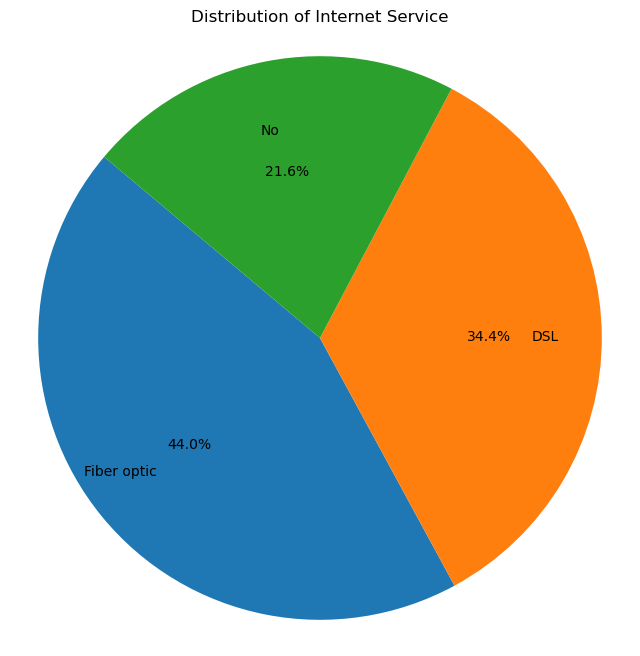

In [15]:
# Count occurrences by gender
InternetService_label = df['InternetService'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    InternetService_label,
    labels=InternetService_label.index,
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=0.75  
)
plt.title('Distribution of Internet Service')
plt.axis('equal')  
plt.show()


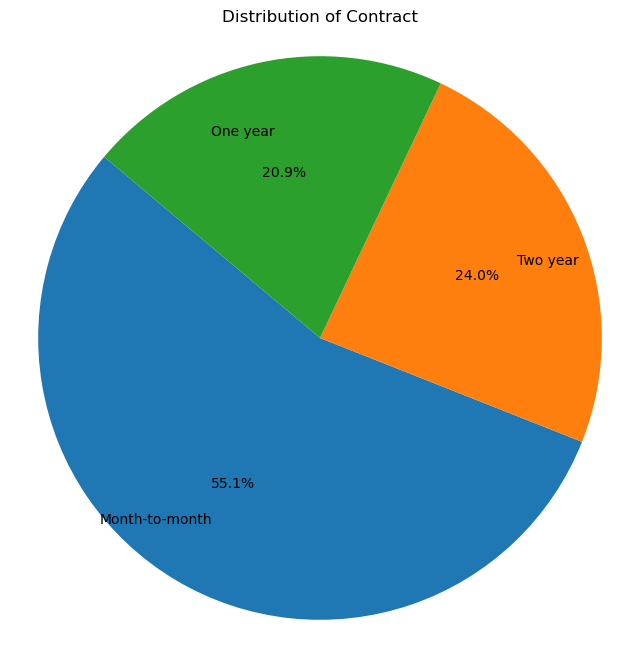

In [16]:
# Count occurrences by gender
Contract_label = df['Contract'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    Contract_label,
    labels=Contract_label.index,
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=0.75  
)
plt.title('Distribution of Contract')
plt.axis('equal')  
plt.show()


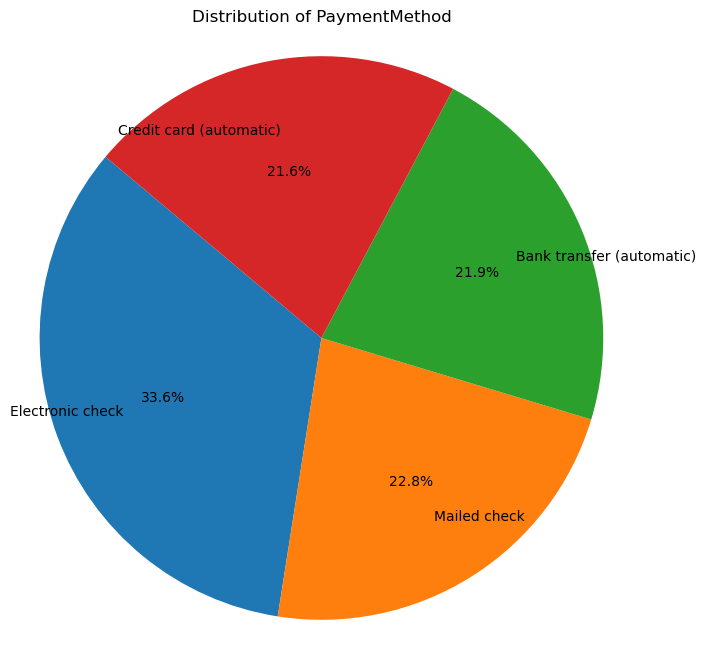

In [17]:
# Count occurrences by gender
PaymentMethod_label = df['PaymentMethod'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    PaymentMethod_label,
    labels=PaymentMethod_label.index,
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=0.75  
)
plt.title('Distribution of PaymentMethod')
plt.axis('equal')  
plt.show()


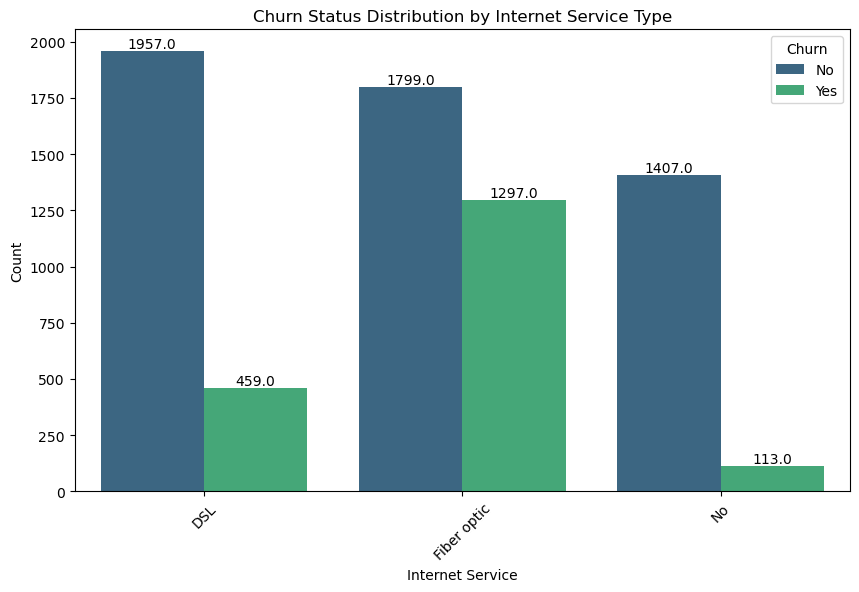

In [18]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='InternetService', hue='Churn', palette='viridis')

# Add count annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=10)

# Plot customization
plt.title('Churn Status Distribution by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Churn') 
plt.show()

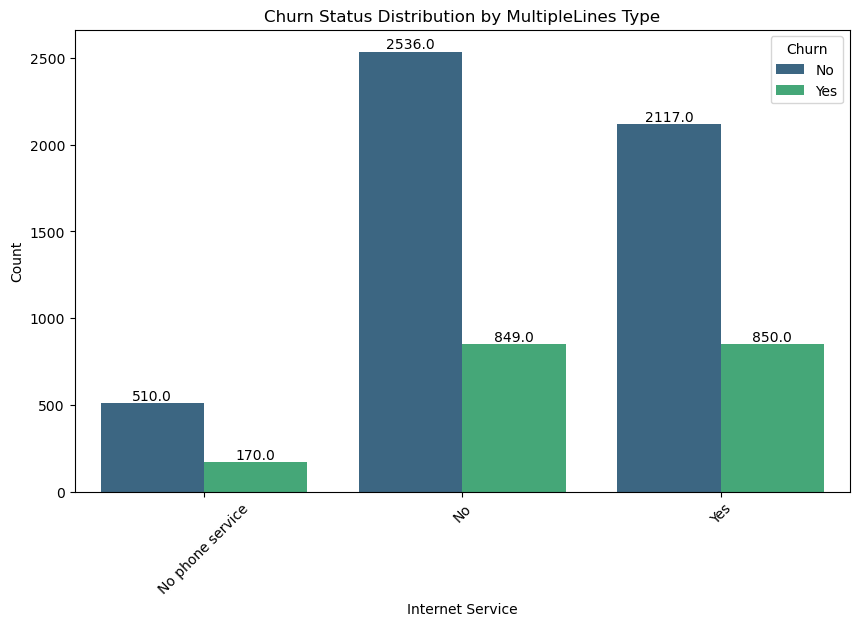

In [19]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='viridis')

# Add count annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=10)

# Plot customization
plt.title('Churn Status Distribution by MultipleLines Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Churn')  # Legend title
plt.show()

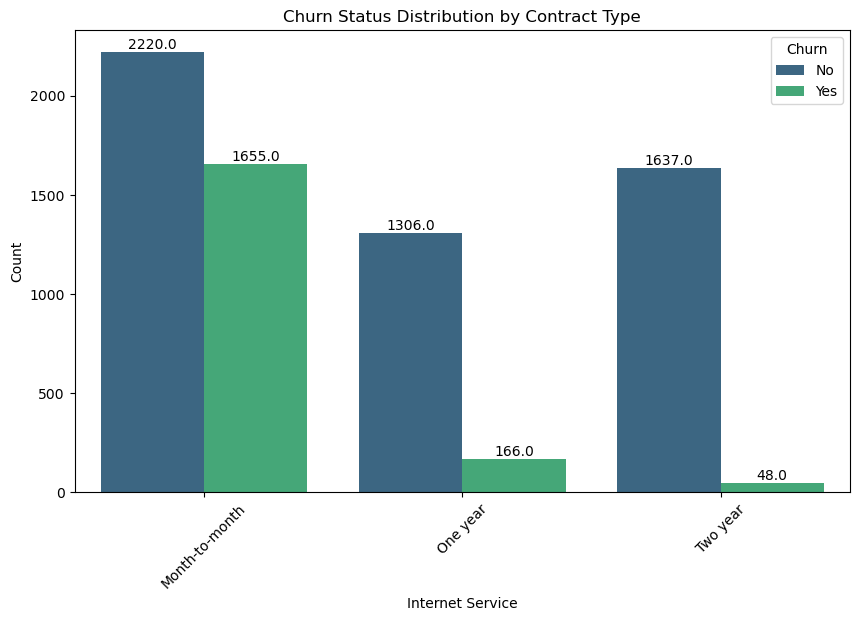

In [20]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')

# Add count annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=10)

# Plot customization
plt.title('Churn Status Distribution by Contract Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Churn')  # Legend title
plt.show()

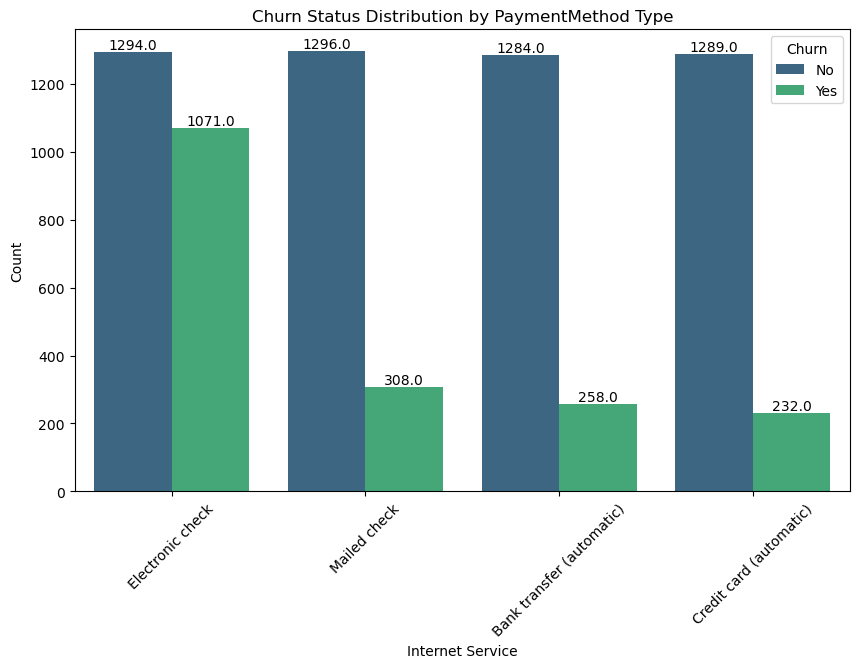

In [21]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='viridis')

# Add count annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=10)

# Plot customization
plt.title('Churn Status Distribution by PaymentMethod Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Churn')  # Legend title
plt.show()

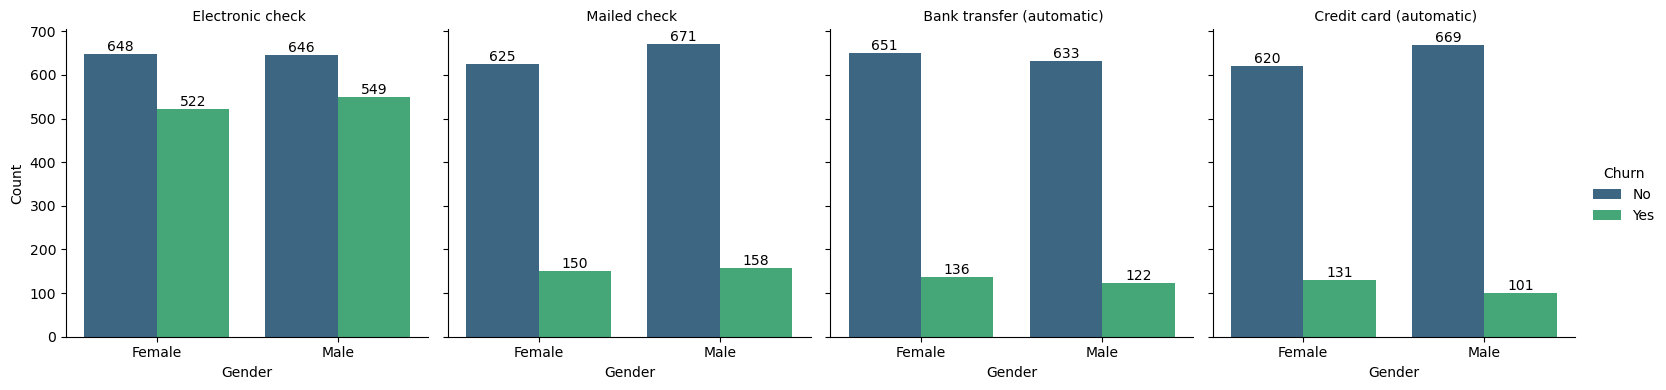

In [22]:
g = sns.catplot(data=df, x='gender', hue='Churn', col='PaymentMethod',
                kind='count', height=4, aspect=1,palette='viridis')

# Set axis labels and titles
g.set_axis_labels("Gender", "Count")
g.set_titles(" {col_name}")

# Add count annotations on the bars
for ax in g.axes.flatten():
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='bottom', 
                    fontsize=10)

# Show the plot
plt.show()